Первые строки датасета:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    in

/tmp/ipykernel_4348/186668164.py:30: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_4348/186668164.py:30: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

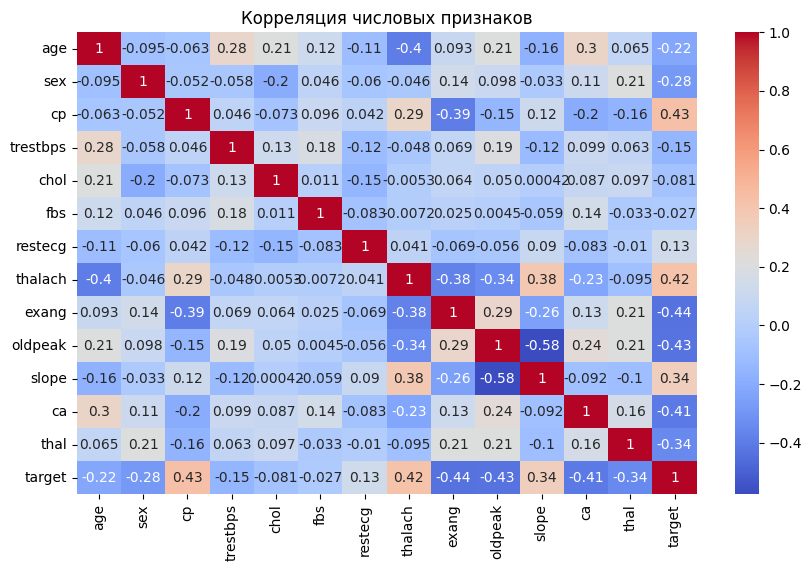

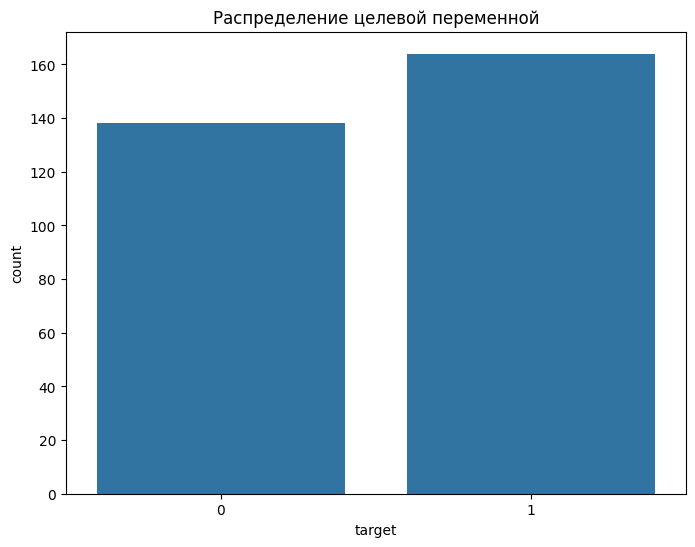

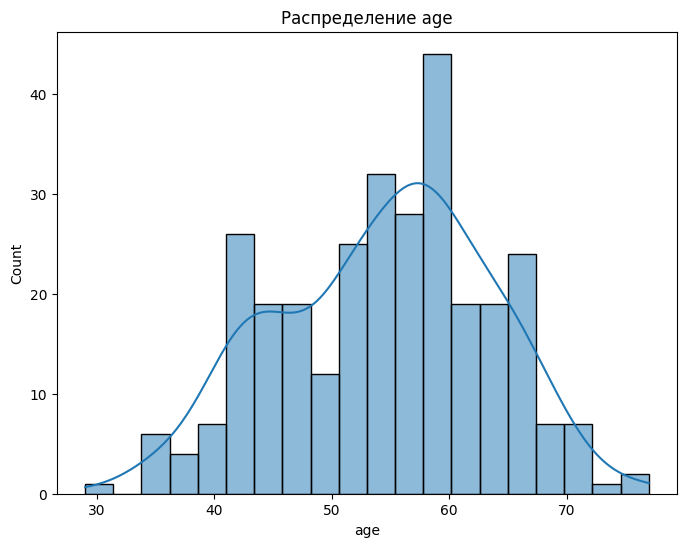

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import os


data_path = "../data/dataset.csv"  # путь к датасету
df = pd.read_csv(data_path)

print("Первые строки датасета:")
print(df.head())

print("\nИнформация о датасете:")
print(df.info())

print("\nСтатистики по числовым признакам:")
print(df.describe())


print("\nКоличество пропусков по признакам:")
print(df.isnull().sum())


df = df.drop_duplicates()


for col in df.select_dtypes(include="number"):
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include="object"):
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nПосле очистки данных:")
print(df.info())


os.makedirs("visualizations", exist_ok=True)


plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')
if not numeric_df.empty:
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.title("Корреляция числовых признаков")
    plt.savefig("visualizations/correlation_heatmap.png")
    plt.show()

# --- График 2: распределение целевой переменной
target_col = 'target'  
if target_col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=target_col, data=df)
    plt.title("Распределение целевой переменной")
    plt.savefig("visualizations/target_distribution.png")
    plt.show()

# --- График 3: распределение числового признака
numeric_columns = df.select_dtypes(include='number').columns
if len(numeric_columns) > 0:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[numeric_columns[0]], bins=20, kde=True)
    plt.title(f"Распределение {numeric_columns[0]}")
    plt.savefig(f"visualizations/{numeric_columns[0]}_distribution.png")
    plt.show()

# --- График 4: boxplot для числового признака по категориальному
categorical_columns = df.select_dtypes(include='object').columns
if len(numeric_columns) > 0 and len(categorical_columns) > 0:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_columns[0], y=numeric_columns[0], data=df)
    plt.title(f"{numeric_columns[0]} по {categorical_columns[0]}")
    plt.savefig("visualizations/boxplot.png")
    plt.show()

# --- График 5: интерактивный scatter plot
if len(numeric_columns) >= 3:
    fig = px.scatter(df,
                    x=numeric_columns[0],
                    y=numeric_columns[1],
                    color=target_col if target_col in df.columns else None,
                    title="Диаграмма рассеяния")
    fig.write_html("visualizations/interactive_scatter.html")
    fig.show()


os.makedirs("../data", exist_ok=True)  # убедимся, что папка существует

with open("../data/clean_dataset.pkl", "wb") as f:
    pickle.dump(df, f)

print("Анализ завершен и данные сохранены!")